##Import libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

##Import dataset

In [ ]:
train = pd.read_csv('/content/trainset3.csv')
train.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,451,PAYMENT,8276.89,C1510341339,10891.0,2614.11,M1519448186,0.00,0.00,0,0
1,1,451,CASH_IN,190885.51,C340616062,100231.0,291116.51,C118179503,0.00,0.00,0,0
2,2,451,CASH_OUT,89829.37,C1854562922,10433.0,0.00,C1717181093,1102583.51,1192412.88,0,0
3,3,451,CASH_IN,88058.96,C455904834,6520.0,94578.96,C1862634094,4385056.84,4296997.88,0,0
4,4,451,CASH_OUT,79915.49,C1180872317,82956.0,3040.51,C1975448285,0.00,79915.49,0,0


##Exploring observations

In [ ]:
train.shape

(278321, 12)

In [ ]:
train['isFraud'].value_counts()

0    276021
1      2300
Name: isFraud, dtype: int64

In [ ]:
train['isFlaggedFraud'].value_counts()

0    278316
1         5
Name: isFlaggedFraud, dtype: int64

In [ ]:
train[['type', 'isFraud']].value_counts()

type      isFraud
PAYMENT   0          98231
CASH_OUT  0          87328
CASH_IN   0          63349
TRANSFER  0          25014
DEBIT     0           2099
CASH_OUT  1           1150
TRANSFER  1           1150
dtype: int64

##EDA

In [ ]:
transfer_df_fraud1 = train.loc[train['isFraud'] == 1][train['type'] == 'TRANSFER']
transfer_df_fraud0 = train.loc[train['isFraud'] == 0][train['type'] == 'TRANSFER']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


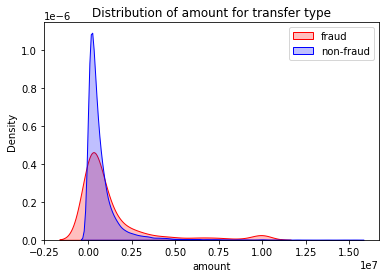

In [ ]:
fig = sns.kdeplot(transfer_df_fraud1['amount'], shade=True, color="red")
fig = sns.kdeplot(transfer_df_fraud0['amount'], shade=True, color="blue")
plt.title('Distribution of amount for transfer type')
plt.legend(['fraud', 'non-fraud'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


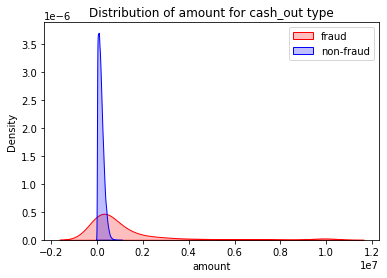

In [ ]:
cashout_df_fraud1 = train.loc[train['isFraud'] == 1][train['type'] == 'CASH_OUT']
cashout_df_fraud0 = train.loc[train['isFraud'] == 0][train['type'] == 'CASH_OUT']

fig = sns.kdeplot(cashout_df_fraud1['amount'], shade=True, color="red")
fig = sns.kdeplot(cashout_df_fraud0['amount'], shade=True, color="blue")
plt.title('Distribution of amount for cash_out type')
plt.legend(['fraud', 'non-fraud'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


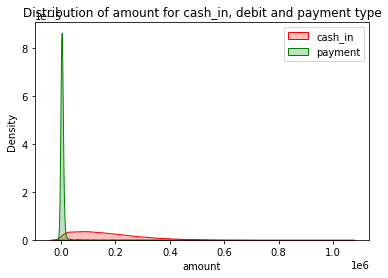

In [ ]:
cashin_df_fraud0 = train.loc[train['isFraud'] == 0][train['type'] == 'CASH_IN']
payement_df_fraud0 = train.loc[train['isFraud'] == 0][train['type'] == 'PAYEMENT']
debit_df_fraud0 = train.loc[train['isFraud'] == 0][train['type'] == 'DEBIT']

fig = sns.kdeplot(cashin_df_fraud0['amount'], shade=True, color="red")
fig = sns.kdeplot(payement_df_fraud0['amount'], shade=True, color="blue")
fig = sns.kdeplot(debit_df_fraud0['amount'], shade=True, color="green")
plt.title('Distribution of amount for cash_in, debit and payment type')
plt.legend(['cash_in', 'payment', 'debit'], loc='upper right')
plt.show()

In [ ]:
# dfTransfer = train.loc[train.type == 'TRANSFER']
# dfpayment = train.loc[train.type == 'PAYMENT']
# dfdebit = train.loc[train.type == 'DEBIT']
# dfcashout = train.loc[train.type == 'CASH_OUT']
# dfcashin = train.loc[train.type == 'CASH_IN']

In [ ]:
fraud=train.loc[train['isFraud']==1]
fraud

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
521,521,451,TRANSFER,9265.43,C1329487815,9265.43,0.0,C1936702457,0.00,0.00,1,0
522,522,451,CASH_OUT,9265.43,C2101131639,9265.43,0.0,C1937187979,0.00,9265.43,1,0
2349,2349,451,TRANSFER,475693.24,C733845370,475693.24,0.0,C1425128293,0.00,0.00,1,0
2350,2350,451,CASH_OUT,475693.24,C23091724,475693.24,0.0,C798547691,28808.22,504501.46,1,0
3772,3772,452,TRANSFER,63262.94,C1275005774,63262.94,0.0,C1128985646,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
277646,277646,666,CASH_OUT,113336.41,C403276933,113336.41,0.0,C506139179,0.00,113336.41,1,0
278224,278224,667,TRANSFER,161536.55,C1715615477,161536.55,0.0,C418678558,0.00,0.00,1,0
278225,278225,667,CASH_OUT,161536.55,C1916979174,161536.55,0.0,C857162108,5580.01,167116.56,1,0
278270,278270,667,TRANSFER,71554.74,C118393699,71554.74,0.0,C1077131612,0.00,0.00,1,0


In [ ]:
fraud.loc[fraud['amount'] == 10000000]

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4987,4987,456,TRANSFER,10000000.0,C1807237119,10585396.14,585396.14,C1910239392,0.00,0.00,1,0
4988,4988,456,CASH_OUT,10000000.0,C1790414268,10000000.00,0.00,C1595458981,13098.64,10013098.64,1,0
11561,11561,469,TRANSFER,10000000.0,C1519426085,16484526.80,6484526.80,C1185086386,0.00,0.00,1,0
11562,11562,469,CASH_OUT,10000000.0,C210168934,10000000.00,0.00,C1856701476,817443.72,10817443.72,1,0
40946,40946,497,TRANSFER,10000000.0,C557530807,13695429.98,3695429.98,C1466553904,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
266763,266763,646,TRANSFER,10000000.0,C24775045,20399045.08,10399045.08,C494244936,0.00,0.00,1,0
266764,266764,646,CASH_OUT,10000000.0,C352927410,10000000.00,0.00,C593822721,0.00,10000000.00,1,0
266765,266765,646,TRANSFER,10000000.0,C19004745,10399045.08,10399045.08,C1806199534,0.00,0.00,1,1
276240,276240,661,TRANSFER,10000000.0,C1058583308,12140888.35,2140888.35,C2061400193,0.00,0.00,1,0


Text(0, 0.5, 'Amount')

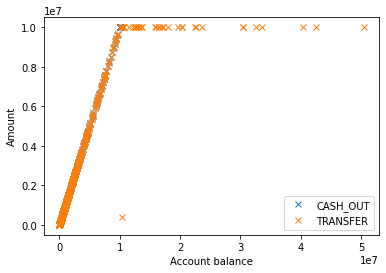

In [ ]:
# colors ={'PAYMENT':'blue', 'CASH_IN':'red', 'CASH_OUT':'green', 'TRANSFER':'yellow', 'DEBIT':'brown'}

# fraud.plot.scatter(x='oldbalanceOrg', y='amount', label='type')
# plt.title('Transaction amount with respect to the account balance')

groups = fraud.groupby("type")
for name, group in groups:
    plt.plot(group["oldbalanceOrg"], group["amount"], marker="x", linestyle="", label=name)
plt.legend()
# plt.title('Fraud transaction amount with respect to the account balance')
plt.xlabel('Account balance')
plt.ylabel('Amount')

whether TRANSFER methods destination is similar to CASH_OUT originating account ?

In [ ]:
transfer_df_fraud1.nameDest.isin(cashout_df_fraud1.nameOrig).any()

False

In [ ]:
fraud = train.loc[train['isFraud'] == 1]

In [ ]:
fraud.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
521,521,451,TRANSFER,9265.43,C1329487815,9265.43,0.0,C1936702457,0.00,0.00,1,0
522,522,451,CASH_OUT,9265.43,C2101131639,9265.43,0.0,C1937187979,0.00,9265.43,1,0
2349,2349,451,TRANSFER,475693.24,C733845370,475693.24,0.0,C1425128293,0.00,0.00,1,0
2350,2350,451,CASH_OUT,475693.24,C23091724,475693.24,0.0,C798547691,28808.22,504501.46,1,0
3772,3772,452,TRANSFER,63262.94,C1275005774,63262.94,0.0,C1128985646,0.00,0.00,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59b7f54c90>]],
      dtype=object)

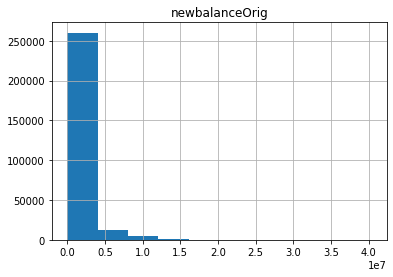

In [ ]:
train.hist(column = 'newbalanceOrig')

###checking on isFlaggedFraud

In [ ]:
train[train['isFlaggedFraud'] == 1]

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
153782,153782,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
190722,190722,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
251696,251696,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
266765,266765,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1
266767,266767,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1


In [ ]:
train[train['nameOrig'] == 'C193696150'][train['nameDest'] =='C484597480']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
153782,153782,554,TRANSFER,3576297.1,C193696150,3576297.1,3576297.1,C484597480,0.0,0.0,1,1


In [ ]:
train[train['nameOrig'] == 'C1684585475'][train['nameDest'] =='C1770418982']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
190722,190722,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1


In [ ]:
train[train['nameOrig'] == 'C786455622'][train['nameDest'] =='C661958277']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
251696,251696,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1


In [ ]:
train[train['nameOrig'] == 'C19004745'][train['nameDest'] =='C1806199534']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
266765,266765,646,TRANSFER,10000000.0,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
train[train['nameOrig'] == 'C724693370'][train['nameDest'] =='C1909486199']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
266767,266767,646,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1


each account is related only to one fraud transaction 

###correlation

In [ ]:
train.drop('Unnamed: 0', axis=1, inplace=True)

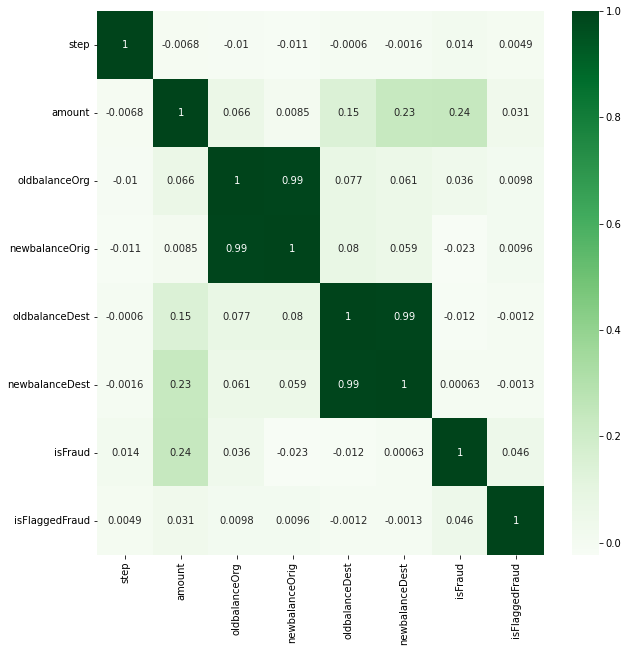

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='Greens')

In [ ]:
fraud1 = train.loc[train['isFraud'] == 1]
fraud0 = train.loc[train['isFraud'] == 0]

In [ ]:
fraud1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
521,451,TRANSFER,9265.43,C1329487815,9265.43,0.0,C1936702457,0.00,0.00,1,0
522,451,CASH_OUT,9265.43,C2101131639,9265.43,0.0,C1937187979,0.00,9265.43,1,0
2349,451,TRANSFER,475693.24,C733845370,475693.24,0.0,C1425128293,0.00,0.00,1,0
2350,451,CASH_OUT,475693.24,C23091724,475693.24,0.0,C798547691,28808.22,504501.46,1,0
3772,452,TRANSFER,63262.94,C1275005774,63262.94,0.0,C1128985646,0.00,0.00,1,0


###point biserial

In [ ]:
from scipy import stats

In [ ]:
stats.pointbiserialr(train['isFraud'], train['oldbalanceDest'])

PointbiserialrResult(correlation=-0.012065958366310536, pvalue=1.943546569900101e-10)

In [ ]:
train[['step', 'amount', 'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest']].corrwith(train['isFraud'].astype('float'), method=stats.pointbiserialr)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1.442081e-02,0.24011,3.570185e-02,-2.293288e-02,-1.206596e-02,0.000627
1,2.778863e-14,0.00000,3.493896e-79,1.055624e-33,1.943547e-10,0.740828


###Eta squared

In [ ]:
!pip install pingouin
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 30.0 MB/s 
     |████████████████████████████████| 9.8 MB 12.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=64774da588fd7c47439d5f7c8e5f8a49f741e9491c6df967b128290d07e03f01
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2e1fd2cd295171bd47949e19b0133b374896ef953f558622ba454db3867d4470
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
lis = ['step', 'amount', 'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest']

variable = []
N2 = []
for i in range(len(lis)):
  x = pg.anova(dv=lis[i], between='isFraud', data=train, effsize='n2')
  n_squared = x.n2 

  N2.append(n_squared)
aov = pd.DataFrame(list(zip(lis, N2)), columns=['independent variable', 'n squared'])

In [ ]:
aov

,independent variable,n squared
0,step,"0 0.000208 Name: n2, dtype: float64"
1,amount,"0 0.057653 Name: n2, dtype: float64"
2,oldbalanceOrg,"0 0.001275 Name: n2, dtype: float64"
3,newbalanceOrig,"0 0.000526 Name: n2, dtype: float64"
4,oldbalanceDest,"0 0.000146 Name: n2, dtype: float64"
5,newbalanceDest,"0 3.930741e-07 Name: n2, dtype: float64"


In [ ]:
aov = pg.anova(dv='amount', between='isFraud', data=train, effsize='n2')
aov.n2

0    0.057653
Name: n2, dtype: float64